In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import nltk
import fastai
from fastai import *
from fastai.text import *
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [5]:
data=pd.read_csv("Tweets.csv")


In [59]:
pip install fastai

  Stored in directory: C:\Users\sujat\AppData\Local\pip\Cache\wheels\45\3e\33\2286dfb90e4d3e197356552c0743678bb158d47f6e05540029
  Stored in directory: C:\Users\sujat\AppData\Local\pip\Cache\wheels\e4\1d\06\640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
Successfully built fastai nvidia-ml-py3
  Found existing installation: zipp 0.3.3
    Uninstalling zipp-0.3.3:
      Successfully uninstalled zipp-0.3.3
  Found existing installation: importlib-metadata 0.0.0
    Uninstalling importlib-metadata-0.0.0:
      Successfully uninstalled importlib-metadata-0.0.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [8]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [9]:
data.shape

(14640, 15)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [12]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

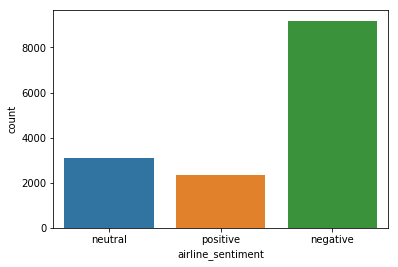

In [14]:
sns.countplot(data['airline_sentiment'])


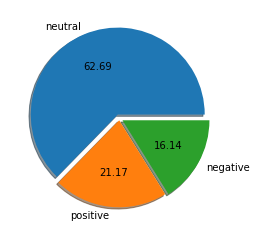

In [15]:
plt.pie(data['airline_sentiment'].value_counts(),explode=[0.05,0.02,0.04],shadow=True,labels=['neutral','positive','negative'],autopct='%.2f');

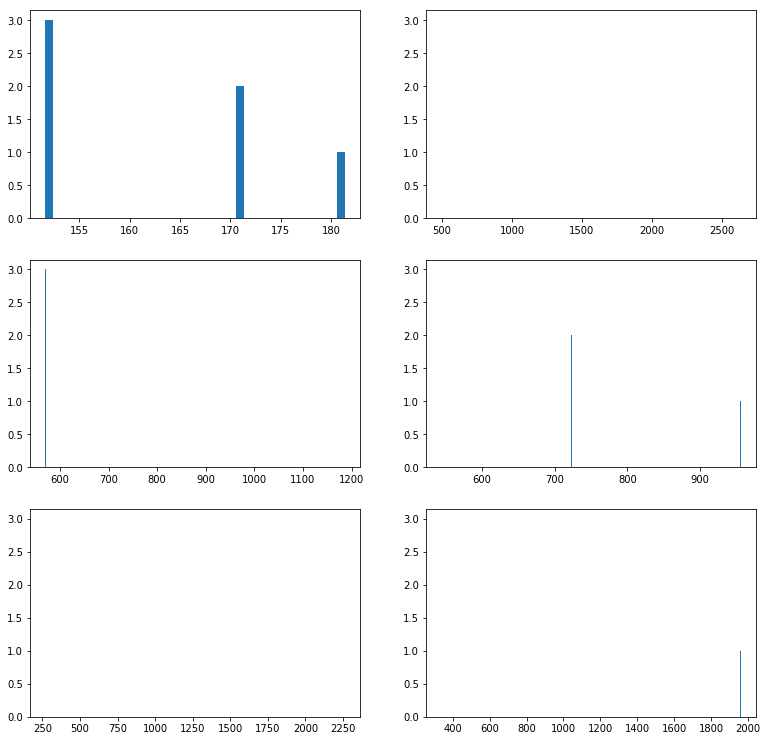

In [16]:
def sentiment(airline):
  new=data[data['airline']==airline]
  count=new['airline_sentiment'].value_counts()
  index=[1,2,3]
  plt.figure(1,figsize=(13,13))
  plt.bar(count,index)
  #plt.xticks(index,['negative','neutral','positive'])
airlinename=data['airline'].unique()
plt.figure(1,figsize=(13,13))
for i in range(6):
  plt.subplot(3,2,i+1)
  sentiment(airlinename[i])

In [17]:
data['negativereason'].value_counts()


Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [18]:
airsentiment=pd.crosstab(data['airline'],data['airline_sentiment'])
airsentiment

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [19]:
percentage=airsentiment.apply(lambda a: a/a.sum()*100,axis=1)


In [20]:
percentage

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


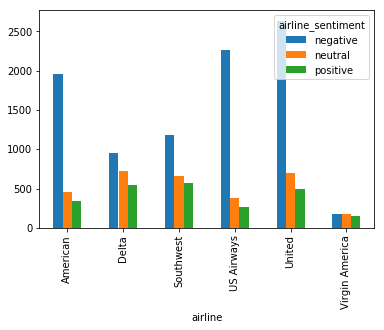

In [21]:
pd.crosstab(index=data['airline'],columns=data['airline_sentiment']).plot(kind='bar')


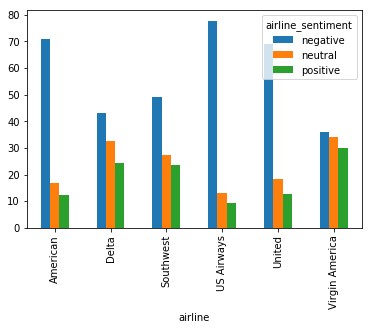

In [22]:
percentage.plot(kind='bar')


In [23]:
import datetime
data['tweet_created']=pd.to_datetime(data['tweet_created'])
data['date_created']=data['tweet_created'].dt.date

In [24]:
data['date_created']


0        2015-02-24
1        2015-02-24
2        2015-02-24
3        2015-02-24
4        2015-02-24
5        2015-02-24
6        2015-02-24
7        2015-02-24
8        2015-02-24
9        2015-02-24
10       2015-02-24
11       2015-02-24
12       2015-02-24
13       2015-02-24
14       2015-02-24
15       2015-02-24
16       2015-02-24
17       2015-02-24
18       2015-02-24
19       2015-02-24
20       2015-02-24
21       2015-02-24
22       2015-02-24
23       2015-02-24
24       2015-02-24
25       2015-02-24
26       2015-02-24
27       2015-02-24
28       2015-02-24
29       2015-02-23
            ...    
14610    2015-02-22
14611    2015-02-22
14612    2015-02-22
14613    2015-02-22
14614    2015-02-22
14615    2015-02-22
14616    2015-02-22
14617    2015-02-22
14618    2015-02-22
14619    2015-02-22
14620    2015-02-22
14621    2015-02-22
14622    2015-02-22
14623    2015-02-22
14624    2015-02-22
14625    2015-02-22
14626    2015-02-22
14627    2015-02-22
14628    2015-02-22


In [25]:
data1=data.groupby(['date_created','airline'])
data1=data1.airline_sentiment.value_counts()
data1.unstack()

airline_sentiment            negative  neutral  positive
date_created airline                                    
2015-02-16   Delta                1.0      1.0       NaN
             United               2.0      NaN       NaN
2015-02-17   Delta              108.0     86.0      69.0
             Southwest          213.0     85.0      86.0
             US Airways         233.0     30.0      48.0
             United             272.0     75.0      49.0
             Virgin America      12.0     21.0      21.0
2015-02-18   American             1.0      NaN       NaN
             Delta              105.0     86.0      77.0
             Southwest          110.0    106.0      76.0
             US Airways         244.0     32.0      41.0
             United             257.0     90.0      59.0
             Virgin America      19.0     21.0      20.0
2015-02-19   American             NaN      NaN       1.0
             Delta              135.0     70.0      78.0
             Southwest          127.0     94.0      96.0
             US Airways         193.0     54.0      32.0
             United             272.0     85.0      69.0
             Virgin America      24.0     26.0      20.0
2015-02-20   American             1.0      NaN       NaN
             Delta               91.0     90.0      70.0
             Southwest          132.0    110.0      77.0
             US Airways         248.0     52.0      33.0
             United             342.0     99.0      85.0
             Virgin America      21.0     32.0      17.0
2015-02-21   American             1.0      NaN       NaN
             Delta               98.0     79.0      66.0
             Southwest          257.0     60.0      53.0
             US Airways         291.0     39.0      30.0
             United             365.0     88.0      53.0
             Virgin America      37.0     12.0      28.0
2015-02-22   American           762.0    132.0      94.0
             Delta              255.0     76.0      77.0
             Southwest          129.0     77.0      73.0
             US Airways         561.0     60.0      27.0
             United             532.0    102.0      69.0
             Virgin America      27.0     16.0      10.0
2015-02-23   American           826.0    178.0     137.0
             Delta              125.0    195.0      71.0
             Southwest          116.0     83.0      77.0
             US Airways         372.0     74.0      42.0
             United             449.0    109.0      83.0
             Virgin America      31.0     37.0      23.0
2015-02-24   American           369.0    153.0     104.0
             Delta               37.0     40.0      36.0
             Southwest          102.0     49.0      32.0
             US Airways         121.0     40.0      16.0
             United             142.0     49.0      25.0
             Virgin America      10.0      6.0      13.0

In [26]:
data2=data[data['airline_sentiment']=='positive']
words=' '.join(data2['text'])

In [27]:
words

'@VirginAmerica plus you\'ve added commercials to the experience... tacky. @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :) @virginamerica Well, I didn\'t…but NOW I DO! :-D @VirginAmerica it was amazing, and arrived an hour early. You\'re too good to me. @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven\'t even gone on my 1st trip yet! ;p @VirginAmerica @virginmedia I\'m flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn @VirginAmerica Thanks! @VirginAmerica So excited for my first cross country flight LAX to MCO I\'ve heard nothing but great things about Virgin America. #29DaysToGo I ❤️ flying @VirginAmerica. ☺️👍 @VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you. @VirginAmerica I love this graphic. http:/

In [31]:
pip install WordCloud


Note: you may need to restart the kernel to use updated packages.


In [37]:
data3=data[data['airline_sentiment']=='neutral']
words=' '.join(data3['text'])

In [38]:
clean_word=' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])

In [39]:
wordcloud=WordCloud(stopwords=STOPWORDS,width=2000,height=2500).generate(clean_word)


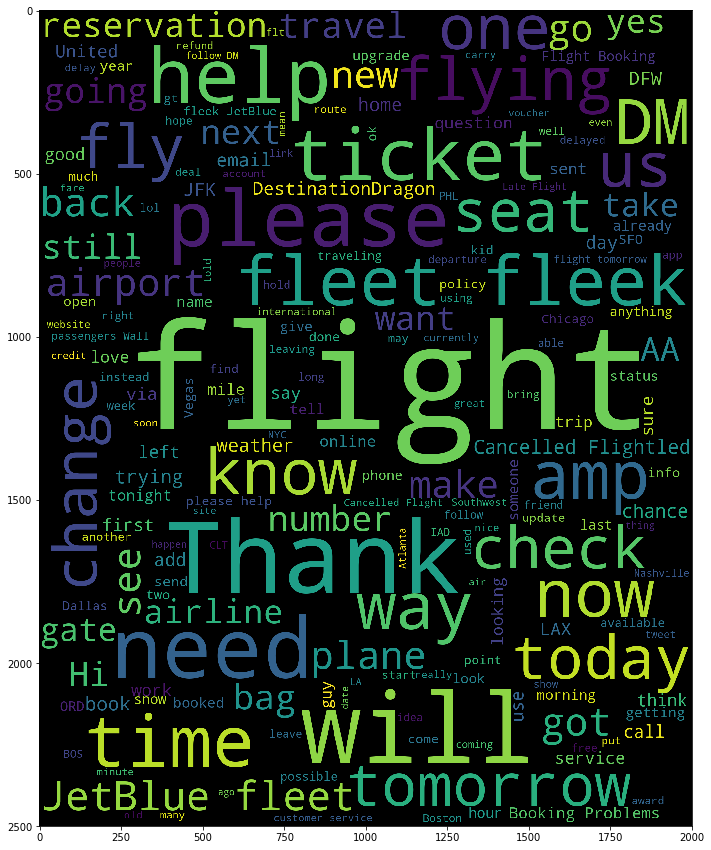

In [40]:
plt.figure(1,figsize=(15,15))
plt.imshow(wordcloud)
plt.show()


In [41]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
def to_words(textdata):
  letters=re.sub('[^a-zA-Z]',' ',textdata)
  word=letters.lower().split()
  stopword=stopwords.words('english')
  usefulwords=[w for w in word if not w in stopword]
  return(' '.join(usefulwords))

In [43]:
def lengthofwords(textdata):
  letters=re.sub('[^a-zA-Z]',' ',textdata)
  word=letters.lower().split()
  stopword=stopwords.words('english')
  usefulwords=[w for w in word if not w in stopword]
  return(len(usefulwords))

In [44]:
STOPWORDS


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a=le.fit(data['airline_sentiment'])

In [46]:
data['sentiment']=a.transform(data['airline_sentiment'])


In [47]:
data['sentiment'].sample(10)


10018    0
9825     0
3677     1
9032     0
12959    0
11395    0
4909     0
12010    0
12822    0
10216    0
Name: sentiment, dtype: int32

In [48]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,date_created,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),2015-02-24,1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),2015-02-24,2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),2015-02-24,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),2015-02-24,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),2015-02-24,0
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33-08:00,NaN,Pacific Time (US & Canada),2015-02-24,0
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57-08:00,San Francisco CA,Pacific Time (US & Canada),2015-02-24,2
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29-08:00,Los Angeles,Pacific Time (US & Canada),2015-02-24,1
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19-08:00,San Diego,Pacific Time (US & Canada),2015-02-24,2
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27-08:00,Los Angeles,Eastern Time (US & Canada),2015-02-24,2


In [49]:
data['clean_tweet']=data['text'].apply(lambda x: to_words(x))
data['tweet_length']=data['text'].apply(lambda x: lengthofwords(x) )
train,test=train_test_split(data,test_size=0.2)

In [50]:
train_clean_tweet=[]
for tweets in train['clean_tweet']:
  train_clean_tweet.append(tweets)
test_clean_tweet=[]
for tweets in test['clean_tweet']:
  test_clean_tweet.append(tweets)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [52]:
vectorizer = TfidfVectorizer()
train_features= vectorizer.fit_transform(train_clean_tweet)
test_features=vectorizer.transform(test_clean_tweet)


In [53]:
dense_train=train_features.toarray()


In [54]:
dense_test=test_features.toarray()


In [55]:
test_percentage = 0.1
data.sort_index(inplace=True)
cutoff = int(test_percentage * data.shape[0])
data[['airline_sentiment', 'text']][:cutoff].to_csv('Tweets_filtered_test.csv', index=False, encoding='utf-8')
data[['airline_sentiment', 'text']][cutoff:].to_csv('Tweets_filtered_train.csv', index=False, encoding='utf-8')
data[['text']][cutoff:].to_csv('Tweets_text_only_train.csv', index=False, encoding='utf-8')

In [61]:
data = TextClasDataBunch.from_csv('.', 'Tweets_filtered_train.csv')
data.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup xxunk xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
"xxbos @usairways e xxrep 4 y ! xxmaj cancelled xxmaj flightlations , xxmaj flight xxmaj booking xxmaj problemss , reflight xxmaj booking xxmaj problemss , but y' all got me on the same flight out tonight ( not tomorrow ) & & the xxup fc upgrade . xxmaj thx !",positive
"xxbos @usairways 4 segments , 4 / 4 delayed . xxmaj gnv > xxup ctl . xxup ctl > xxup jan . xxup jan > xxup ctl . xxup ctl > xxup gnv . xxmaj my year off from flying with you guys was the way to go .",negative
xxbos @americanair xxmaj aww xxmaj thanks xxup aa .. xxup dfw was on xxup gma up here this xxup am .. so i understand .. xxmaj btw xxup a.a is my xxmaj airline when i m able to trv .. xxmaj love you guys . : ),positive
"xxbos @southwestair xxmaj loved one 's flight xxup atl to xxup ind xxmaj cancelled xxmaj flightled due to "" ice in xxmaj indy "" . xxmaj sitting here in xxmaj indy , it is xxunk dry . xxmaj tomorrow 4 - 6 "" of snow .",negative


In [62]:
data.vocab.itos[:10]


['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [63]:
print(data.train_ds[0][0])
print(data.train_ds[1][0])
print(data.train_ds[2][0])

xxbos @united why is it so impossible to actually get a passenger xxup and their luggage to their final destination ?
xxbos @usairways the xxunk of traveling n xxunk thru the airport and tryin xxunk a car n not xxunk myself my family or anybody on the road
xxbos @united where is my bag ? ? i 'm in xxmaj mexico about to go xxunk a house & & my suitcase never got on my flight from xxup cle w me . i need it . xxup san68059 m


In [64]:
print(data.train_ds[0][0].data[:10])
print(data.train_ds[1][0].data[:10])
print(data.train_ds[2][0].data[:10])

[   2   26   92   28   32   68 1098   10  489   48]
[  2  25  12   0  33 555 832   0 497  12]
[  2  26 222  28  24 114  14  14  11  81]


In [65]:
bs = 24
seed = 333

In [66]:
data_lm = (TextList.from_csv('.', 'Tweets_text_only_train.csv')
            .random_split_by_pct(0.1, seed = seed)
           #We randomly split and keep 10% for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

C:\Users\sujat\Anaconda3\lib\site-packages\fastai\data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [67]:
data_lm.show_batch()

idx,text
0,xxmaj xxunk ( xxmaj australia ) to xxmaj bogota ( xxmaj xxunk ) tomorrow xxbos @united xxmaj hi . xxmaj my relative 's xxmaj flight xxmaj booking xxmaj problems number is xxup xxunk . xxmaj her name is xxmaj xxunk xxmaj xxunk xxmaj xxunk . xxmaj thank you xxbos @united it was delivered ! xxmaj thank you for making sure it arrived at my xxunk ! xxbos @united - rebooked
1,"good to know . xxbos @united okay . xxmaj thanks . xxbos @united xxmaj conference xxunk in 3 hours . xxmaj up all night due to delays and still waiting to talk to someone about lost luggage . xxbos @united xxmaj seat xxup xxunk , xxmaj flight xxup xxunk xxbos @united is it on a flight now ? xxmaj thanks for reply . xxbos @united is xxunk and i am"
2,"and the delay turns into a xxmaj cancelled xxmaj flight ... xxbos @united xxup ua xxunk delayed again - i get charged $ 600 if xxmaj late xxmaj flight by you - you say "" oh well "" xxbos @united we are trying to go as far away from king'scollegelondon as possible for # charity today . xxmaj would you help us ? # jailbreak # xxup rag xxbos @united"
3,"to 1st class . xxmaj xxunk ? xxmaj really ? @united : xxunk xxmaj your xxunk is xxunk xxbos @united xxmaj thanks xxmaj yup i 'm all set . xxmaj it happens . xxup slc ground staff were prompt , helpful and courteous . xxbos xxmaj there were plenty of empty seats in coach "" @united : xxmaj your xxunk is understood . xxmaj crew members traveling for duty are"
4,"i boarded . xxbos “ @united : xxunk xxmaj sorry to hear about your flight . xxmaj do you need help reflight xxmaj booking xxmaj problems ? ” \n \n 👎 xxbos @united now we are trying to get to xxmaj san xxmaj juan from xxmaj chicago o'hare . xxmaj having lots of problems . xxmaj may get a standby flight . xxbos @united xxmaj alright , thank you"


In [68]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)


In [69]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


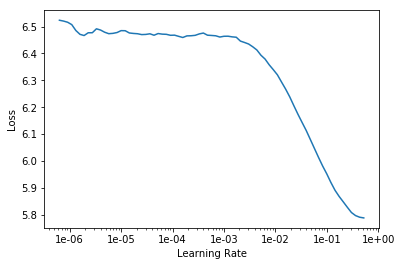

In [70]:
learn.recorder.plot(skip_end=15)

In [71]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.096460,3.805531,0.266339,13:50


In [72]:
learn.save('fit_head')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.save('fine_tuned')

In [ ]:
learn.save_encoder('fine_tuned_enc')

In [ ]:
data_clas = (TextList.from_csv('.', 'Tweets_filtered_train.csv', cols = 'text')               
             .random_split_by_pct(0.1, seed = seed)
             .label_from_df(cols=0)
             .databunch(bs=bs))
data_clas.save('data_clas.pkl')
data_clas.show_batch()

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

In [ ]:
learn.save('first')

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [ ]:
learn.save('second')


In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [ ]:
test_df = pd.read_csv("Tweets_filtered_test.csv", encoding="utf-8")
test_df['airline_sentiment'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,precision_recall_curve,precision_score,recall_score

In [ ]:
test_df['pred_sentiment'] = test_df['text'].apply(lambda row: str(learn.predict(row)[0]))
print("Test Accuracy: ", accuracy_score(test_df['airline_sentiment'], test_df['pred_sentiment']))